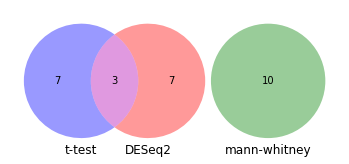

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
from scipy.stats import mannwhitneyu, ttest_ind

unpaired_FPKM = pd.read_csv('colon_cancer_tumor_vs_normal_unpaired_FPKM.tsv.txt', sep = '\t', index_col = 0)
k = pd.read_csv('3.txt', sep = '\t', index_col = 0)
top_unpaired_genes = set(k.index)

unpaired_FPKM["p-value"] = ttest_ind(unpaired_FPKM.iloc[:, :5], unpaired_FPKM.iloc[:, 5:], axis=1)[1]
unpaired_FPKM['mannwhitneyu']=unpaired_FPKM.apply(lambda x: mannwhitneyu(x[:5], x[ 5:10])[1], axis=1)

top_mannwhitneyu = set(unpaired_FPKM.nsmallest(10,  'mannwhitneyu').index)
top_ttest = set(unpaired_FPKM.nsmallest(10,  'p-value').index)

venn3([top_unpaired_genes,top_mannwhitneyu, top_ttest], set_labels = ('DESeq2', 'mann-whitney', 't-test'))
plt.show()